# Mental Health In Tech
### Trends By Industry

 #### A) Are tech employees more likely than non-tech employees to have a mental health condition? 
 #### B) Are tech companies more likely than non-tech companies to offer mental health benefits?


In [39]:
from pathlib import Path
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

file_path = Path("Resources/OSMI_clean.csv")
df = pd.read_csv(file_path)
#print(df.columns)
for column in df.columns:
    print(column)


tech company
employer provided healthcare with mental benefits
employer provided mental healthcare awareness
current mental health disorder
mental health diagnosis
family history of mental illness
discussed personal mental health with employer
anonymity protected when using benefits
ease of asking for leave
comfortable discussing a mental health issue with direct supervisor(s)
comfortable discussing a mental health issue with coworkers
Number of employees
how well do you think the tech industry supports employees with mental health issues
observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?
observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace
Age
Gender
Country of residence
Race
year


In [40]:
df.head()

,tech company,employer provided healthcare with mental benefits,employer provided mental healthcare awareness,current mental health disorder,mental health diagnosis,family history of mental illness,discussed personal mental health with employer,anonymity protected when using benefits,ease of asking for leave,comfortable discussing a mental health issue with direct supervisor(s),comfortable discussing a mental health issue with coworkers,Number of employees,how well do you think the tech industry supports employees with mental health issues,observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?,observed or experienced supportive or well handled response to a mental health issue in your current or previous workplace,Age,Gender,Country of residence,Race,year
0,1.0,No,Yes,Possibly,NaN,No,0.0,I don't know,I don't know,Yes,Yes,100-500,1.0,"Yes, I experienced","Yes, I experienced",27.0,Female,United Kingdom,NaN,2017
1,1.0,Yes,Yes,Possibly,NaN,No,0.0,I don't know,I don't know,Maybe,Yes,100-500,2.0,"Yes, I observed",Maybe/Not sure,31.0,male,United Kingdom,NaN,2017
2,1.0,I don't know,No,Yes,Yes,Yes,1.0,Yes,Difficult,Yes,Maybe,6-25,1.0,"Yes, I experienced","Yes, I experienced",36.0,male,United States of America,White,2017
3,1.0,Yes,Yes,Yes,Yes,I don't know,1.0,Yes,Difficult,Yes,Yes,More than 1000,2.0,Maybe/Not sure,Maybe/Not sure,22.0,Male,United States of America,White,2017
4,NaN,NaN,NaN,No,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,1.0,No,"Yes, I observed",52.0,female,United States of America,More than one of the above,2017


### Mental Health Disorder/Issue by Tech Status

In [41]:
# Create a new column indicating whether an employee is in a tech company or not
df['Tech_Status'] = df['tech company'].apply(lambda x: 'Tech' if x == '1.0' else 'Non-Tech')

# Group by 'Tech_Status' and calculate the percentage of employees with a mental health disorder
result = df.groupby('Tech_Status')['current mental health disorder'].value_counts(normalize=True).unstack()

# Print the result
print(result)

current mental health disorder  Don't Know        No  Possibly       Yes
Tech_Status                                                             
Non-Tech                          0.091416  0.282051  0.201784  0.424749
Tech                              0.085197  0.312034  0.203408  0.399361


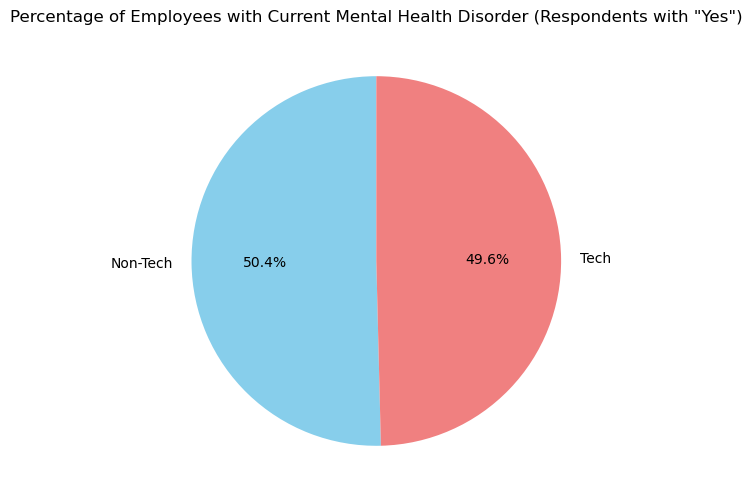

In [43]:
# Filter the DataFrame for respondents with a current mental health disorder
df_mental_health_yes = df[df['current mental health disorder'] == 'Yes']

# Count the occurrences of mental health disorders in each group
count_data = df_mental_health_yes.groupby(['Tech_Status']).size()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(count_data, labels=count_data.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Percentage of Employees with Current Mental Health Disorder (Respondents with "Yes")')

plt.show()

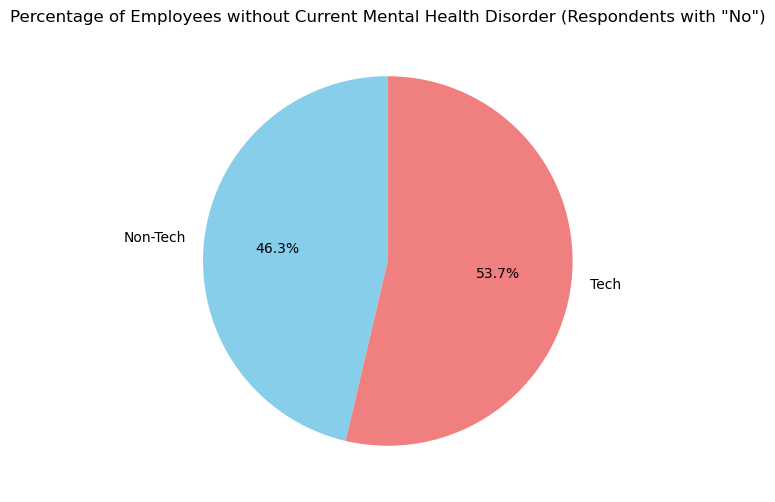

In [44]:
# Filter the DataFrame for respondents without a current mental health disorder
df_mental_health_no = df[df['current mental health disorder'] == 'No']

# Count the occurrences of mental health disorders in each group
count_data = df_mental_health_no.groupby(['Tech_Status']).size()

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(count_data, labels=count_data.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Percentage of Employees without Current Mental Health Disorder (Respondents with "No")')

plt.show()

###  Find out if tech companies are more likely than non-tech companies to offer mental health benefits

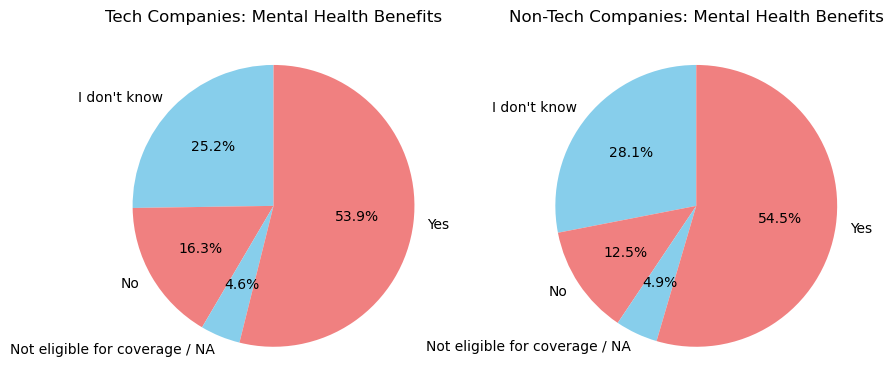

In [45]:



# Count the occurrences of mental health benefits in each group
count_data = df.groupby(['Tech_Status', 'employer provided healthcare with mental benefits']).size().unstack()

# Plot the pie chart
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.pie(count_data.loc['Tech'], labels=count_data.columns, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Tech Companies: Mental Health Benefits')

plt.subplot(1, 2, 2)
plt.pie(count_data.loc['Non-Tech'], labels=count_data.columns, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
plt.title('Non-Tech Companies: Mental Health Benefits')

plt.show()

